In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading, Exploration and Preprocessing

In [407]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [408]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [409]:
df.shape

(545, 13)

In [410]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [411]:
# basic data cleaning from useless information
for column in df.columns:
    if df[column].nunique() >= (df.shape[0] * 0.75):
        print(f'{column} contains {df[column].nunique()} and can be dropped off!')
        df = df.drop(column, axis=1)
    else:
        print(f'{column} - {df[column].nunique()}')

price - 219
area - 284
bedrooms - 6
bathrooms - 4
stories - 4
mainroad - 2
guestroom - 2
basement - 2
hotwaterheating - 2
airconditioning - 2
parking - 4
prefarea - 2
furnishingstatus - 3


In [412]:
df.shape

(545, 13)

In [413]:
# basic data cleaning from null values
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print(f'column {column} contains {df[column].isnull().sum()} NaNs. Enter R to remove and F to fill:')
        if input('Enter R to remove column and F to fill column with mean').lower() == 'r':
            df = df.drop(column, axis=1)
        else:
            if df[column].dtype == object:
                df[column] = df[column].fillna(df[column].value_counts().idxmax())
            else:
                df[column] = df[column].fillna(df[column].mean())

In [414]:
df.isnull().sum(), df.shape

(price               0
 area                0
 bedrooms            0
 bathrooms           0
 stories             0
 mainroad            0
 guestroom           0
 basement            0
 hotwaterheating     0
 airconditioning     0
 parking             0
 prefarea            0
 furnishingstatus    0
 dtype: int64,
 (545, 13))

In [415]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [416]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [417]:
for column, dtype in zip(df.columns, df.dtypes):
    if dtype != object:
        continue
    hashmap = {}
    i = 0
    for a in df[column].unique():
        hashmap[a] = i
        i += 1

    print(hashmap)
    df[column] = df[column].apply(lambda x: hashmap[x])

{'yes': 0, 'no': 1}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'yes': 0, 'no': 1}
{'yes': 0, 'no': 1}
{'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2}


In [418]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,0,0,0,0,2,0,0
1,12250000,8960,4,4,4,0,0,0,0,0,3,1,0
2,12250000,9960,3,2,2,0,0,1,0,1,2,0,1
3,12215000,7500,4,2,2,0,0,1,0,0,3,0,0
4,11410000,7420,4,1,2,0,1,1,0,0,2,1,0


In [419]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [420]:
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / df[column].max()

In [421]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.868421,0.356173,0.500000,0.25,0.50,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0
1,0.789474,0.451235,0.500000,0.75,0.75,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0
2,0.789474,0.512963,0.333333,0.25,0.25,0.0,0.0,1.0,0.0,1.0,0.666667,0.0,0.5
3,0.786842,0.361111,0.500000,0.25,0.25,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.0
4,0.726316,0.356173,0.500000,0.00,0.25,0.0,1.0,1.0,0.0,0.0,0.666667,1.0,0.0


# Data Visualization

<Axes: >

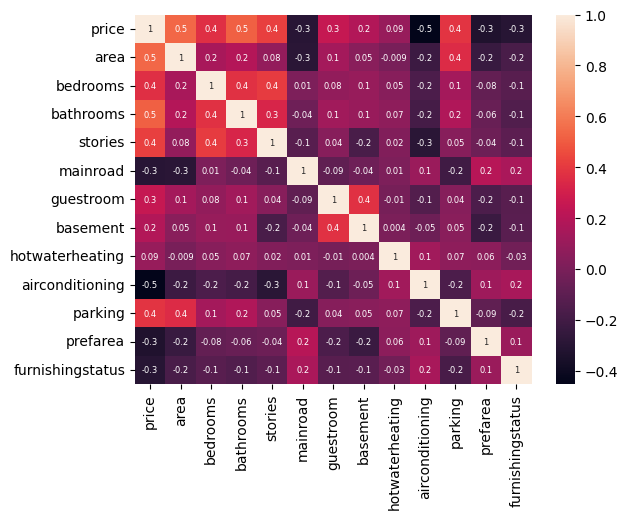

In [422]:
sns.heatmap(df.corr(), annot=True, fmt='.1g', annot_kws={"fontsize":6})

<Axes: >

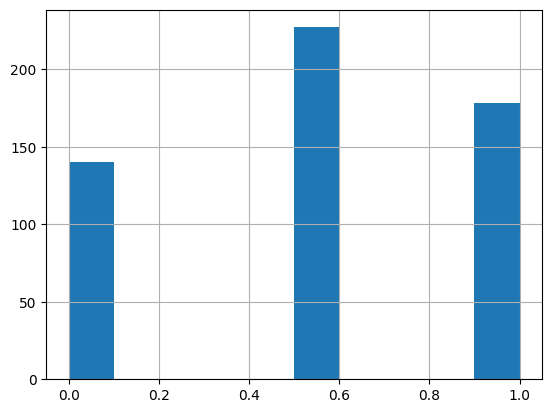

In [423]:
df['furnishingstatus'].hist()

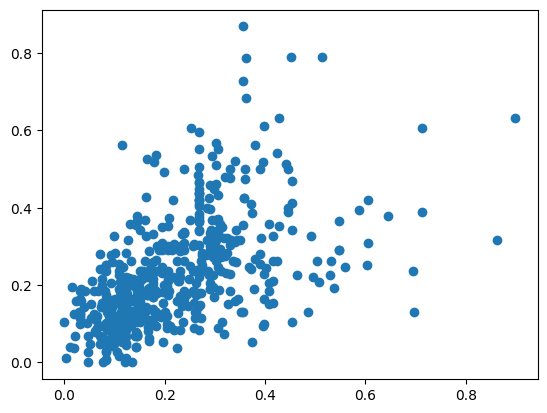

In [424]:
plt.scatter(df['area'], df['price']);

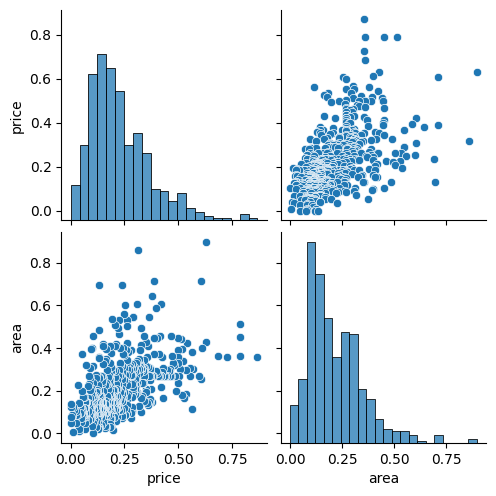

In [425]:
sns.pairplot(df[['price', 'area']])

In [426]:
X = np.array(df.drop('price', axis=1))
y = np.array(df['price'])

Cool!

In [427]:
class LinearRegression:
    def __init__(self, X, y, learning_rate=0.01):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate

        self.weights = None
        self.bias = None
    
    def fit(self, epochs=100, with_plot_data=True):
        n_samples, n_features = self.X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        if with_plot_data:
            plot_data = []
        else:
            plot_data = None

        for epoch in range(epochs):
            pred = np.dot(self.X, self.weights) + self.bias
            loss = np.sum(pred - self.y) ** 2

            if with_plot_data:
                plot_data.append(float(loss))
            
            if epoch % (epochs // 20) == 0:
                print(f'Epoch: {epoch}/{epochs}| Pred[:5]: {pred[:5]}| Loss: {loss}')

            dw = (1 / n_samples) * np.dot(self.X.T, (pred - self.y))
            db = (1 / n_samples) * np.sum(pred - self.y)


            self.weights = self.weights - dw * self.learning_rate
            self.bias -= self.bias - db * self.learning_rate
        
        return [range(epochs), plot_data]

    def predict(self, data):
        return np.dot(data, self.weights) + self.bias
        

In [428]:
""" def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db"""


' def fit(self, X, y):\n        n_samples, n_features = X.shape\n        self.weights = np.zeros(n_features)\n        self.bias = 0\n\n        for _ in range(self.n_iters):\n            y_pred = np.dot(X, self.weights) + self.bias\n\n            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))\n            db = (1/n_samples) * np.sum(y_pred-y)\n\n            self.weights = self.weights - self.lr * dw\n            self.bias = self.bias - self.lr * db'

In [429]:
linear_regression_model = LinearRegression(X, y)
history = linear_regression_model.fit(epochs=50_000)

Epoch: 0/50000| Pred[:5]: [0. 0. 0. 0. 0.]| Loss: 15281.37348924277
Epoch: 2500/50000| Pred[:5]: [0.40222599 0.59548263 0.3954711  0.46033209 0.43925359]| Loss: 33.88875234026763
Epoch: 5000/50000| Pred[:5]: [0.43712146 0.63638676 0.42282799 0.47903353 0.42885296]| Loss: 20.476592940195733
Epoch: 7500/50000| Pred[:5]: [0.44517565 0.64976899 0.43344638 0.48175181 0.42348794]| Loss: 16.891139316435204
Epoch: 10000/50000| Pred[:5]: [0.44824861 0.65766725 0.43991643 0.48256761 0.42026257]| Loss: 15.342578523176066
Epoch: 12500/50000| Pred[:5]: [0.44977528 0.6633187  0.44438208 0.48294018 0.41798906]| Loss: 14.551849812420837
Epoch: 15000/50000| Pred[:5]: [0.45061218 0.66757667 0.44757342 0.48311282 0.41627598]| Loss: 14.127032466367785
Epoch: 17500/50000| Pred[:5]: [0.45107993 0.67082882 0.44988972 0.48317455 0.41495644]| Loss: 13.89962519166771
Epoch: 20000/50000| Pred[:5]: [0.45133624 0.67332206 0.45158891 0.48317537 0.41393404]| Loss: 13.7829823726485
Epoch: 22500/50000| Pred[:5]: [0.45

In [430]:
linear_regression_model.weights

array([ 4.20625843e-01,  2.02219004e-01,  2.61549224e-01,  1.68392660e-01,
       -2.45820793e-02,  2.93396095e-02,  4.58751335e-02,  5.62554823e-02,
       -3.09122092e-02,  7.65250102e-02, -8.59616525e-03, -6.66850254e-05])

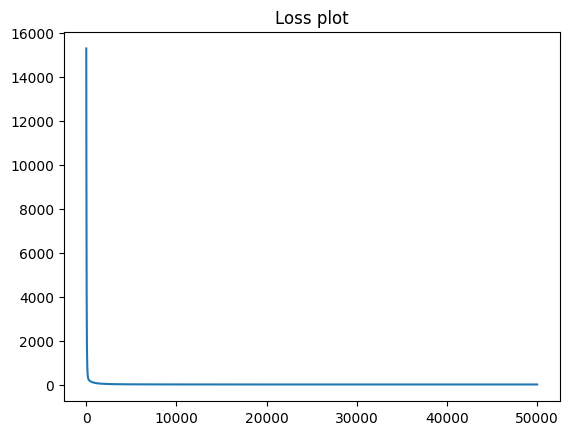

In [431]:
plt.title('Loss plot')
plt.plot(history[0], history[1]);

In [432]:
y_pred = linear_regression_model.predict(X)
print(y_pred[:5])

[0.45145719 0.68122756 0.45653541 0.48281966 0.41059029]


In [433]:
y[:5]

array([0.86842105, 0.78947368, 0.78947368, 0.78684211, 0.72631579])